In [1]:
from pandata.pandataset import PanDataSet
import pandas as pd
import matplotlib.pyplot as plt
ds = PanDataSet('10.1594/PANGAEA.864110')

In [2]:
ds.title

'Moored current and temperature measurements in the Faroe Bank Channel overflow region at mooring site C3, June 2012-June 2013'

In [3]:
ds.data.columns

Index(['Date/Time', 'Depth water', 'Temp', 'UC', 'VC', 'Latitude', 'Longitude',
       'Elevation', 'Event'],
      dtype='object')

In [4]:
ds.data['Depth water'].unique()

array([833, 828, 823, 818, 813, 808, 803, 798, 793, 788, 783, 778, 773,
       768, 763, 758, 753, 748, 743, 738, 733, 728, 723], dtype=int64)

In [12]:
ds.data.set_index(['Date/Time'], inplace=True)
ds.data.head()

KeyError: 'Date/Time'

In [11]:
ds.data.describe()

,Depth water,Temp,UC,VC,Latitude,Longitude,Elevation
count,202710.000000,202707.000000,121332.000000,121332.000000,2.027100e+05,2.027100e+05,202710.0
mean,778.685413,1.210821,-33.875656,57.311340,6.156010e+01,-8.628400e+00,-859.0
std,32.823520,1.890913,24.707636,31.619348,2.049281e-10,2.870244e-11,0.0
min,723.000000,-0.582000,-122.990000,-39.220000,6.156010e+01,-8.628400e+00,-859.0
25%,748.000000,-0.192900,-52.670000,33.330000,6.156010e+01,-8.628400e+00,-859.0
50%,778.000000,0.308400,-36.590000,57.840000,6.156010e+01,-8.628400e+00,-859.0
75%,808.000000,2.156850,-16.000000,81.810000,6.156010e+01,-8.628400e+00,-859.0
max,833.000000,8.251600,50.430000,163.990000,6.156010e+01,-8.628400e+00,-859.0


In [7]:
mf= pd.pivot_table(ds.data.loc['2012-06-01':'2012-06-20'], index='Depth water', columns='Date/Time', values='VC',fill_value=0)
mf.head()

Date/Time,2012-06-01 00:00:00,2012-06-01 01:00:00,2012-06-01 02:00:00,2012-06-01 03:00:00,2012-06-01 04:00:00,2012-06-01 05:00:00,2012-06-01 06:00:00,2012-06-01 07:00:00,2012-06-01 08:00:00,2012-06-01 09:00:00,...,2012-06-20 14:00:00,2012-06-20 15:00:00,2012-06-20 16:00:00,2012-06-20 17:00:00,2012-06-20 18:00:00,2012-06-20 19:00:00,2012-06-20 20:00:00,2012-06-20 21:00:00,2012-06-20 22:00:00,2012-06-20 23:00:00
Depth water,,,,,,,,,,,,,,,,,,,,,
728,6.20,8.71,5.60,-1.60,-1.90,-7.60,-3.18,-4.24,-5.59,-7.08,...,-15.08,-1.74,12.11,9.72,14.72,11.51,12.56,8.96,20.63,34.84
733,-1.65,10.72,3.18,5.55,0.07,-8.47,-6.15,-4.10,-0.76,-2.66,...,-13.39,1.37,11.71,10.84,15.19,13.47,12.04,12.72,23.23,36.84
738,7.32,11.28,4.16,5.64,1.51,-5.91,-1.87,-1.42,-2.22,0.78,...,-9.61,4.89,9.21,11.47,17.30,11.30,14.19,13.46,27.27,36.73
743,6.28,9.57,7.47,9.69,5.98,5.14,3.52,1.91,7.11,7.73,...,-7.42,5.06,10.84,12.63,16.70,8.66,16.99,14.16,29.06,38.06
748,8.02,9.34,6.33,14.02,10.76,1.51,9.02,3.56,9.44,13.67,...,-6.28,6.77,10.12,10.65,18.58,10.23,16.81,13.72,30.16,39.06


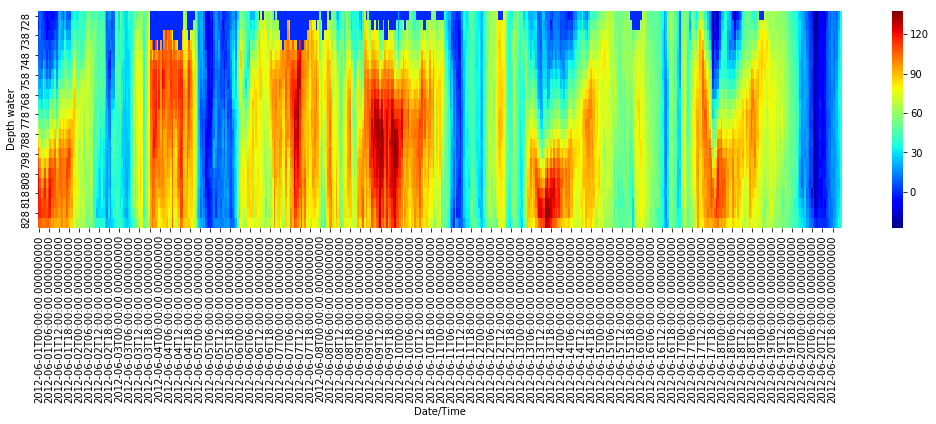

In [8]:
#import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
fig=plt.figure(figsize=(18,4))
ax=sns.heatmap(mf, square=False,cmap="jet")
#ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=6))
plt.show()